In [ ]:
# Data handling
import pandas as pd
import numpy as np
import sys
from pathlib import Path

# Add repo root to sys.path
repo_root = Path().resolve().parent
sys.path.append(str(repo_root))

# Preprocessing functions
from src.dataprep.data_loader import load_housing_data

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### Load the dataset

In [ ]:
data_path = repo_root / "data" / "housing_dataset.csv"
df = load_housing_data(path=data_path)

### Basic info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Check missing values

In [13]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Visualisations

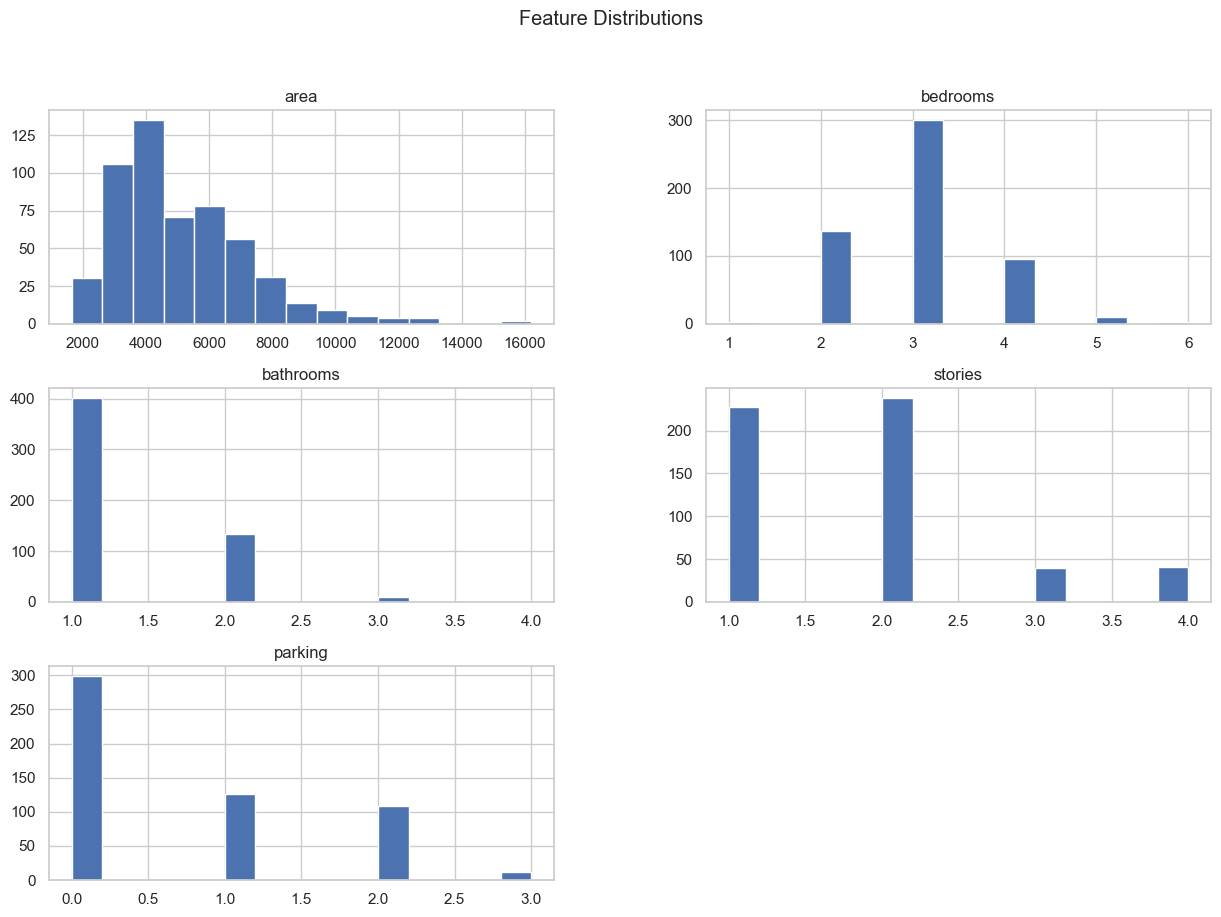

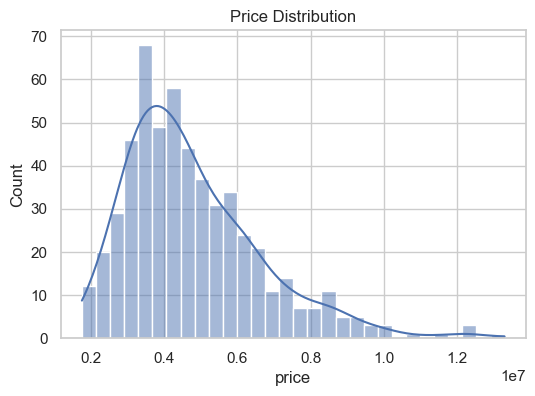

In [14]:
# Histograms for numeric columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols.remove("price")  # remove target

df[num_cols].hist(bins=15, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()

# Target variable
plt.figure(figsize=(6,4))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()

### Categorical Analysis

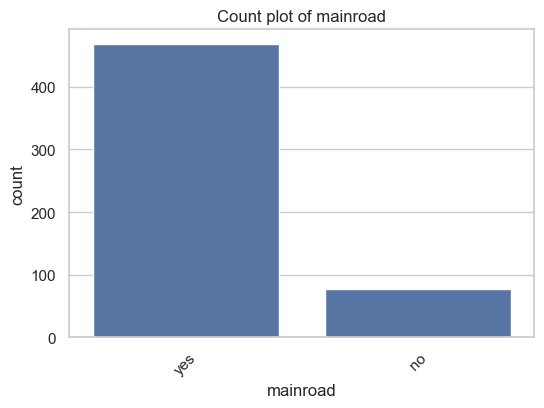

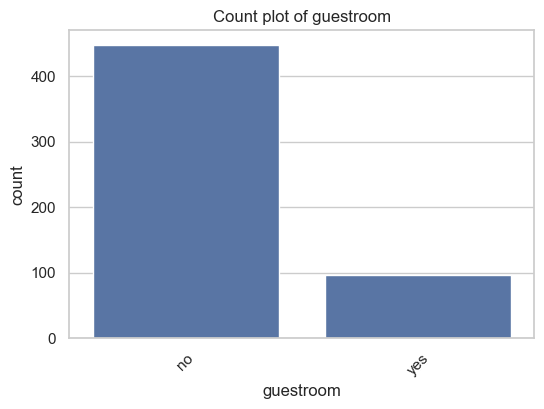

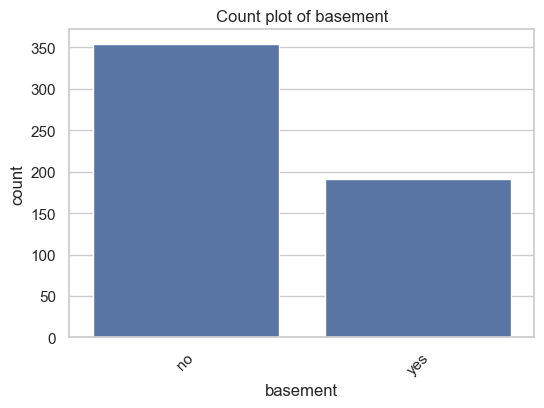

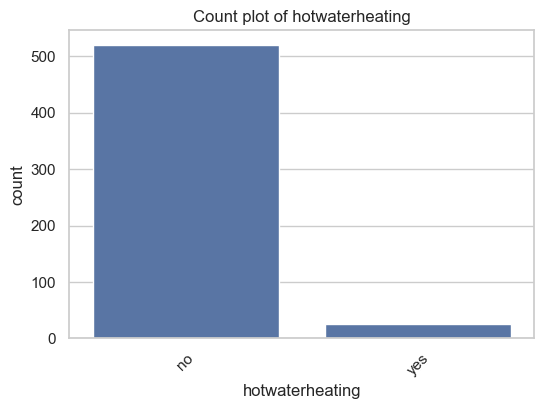

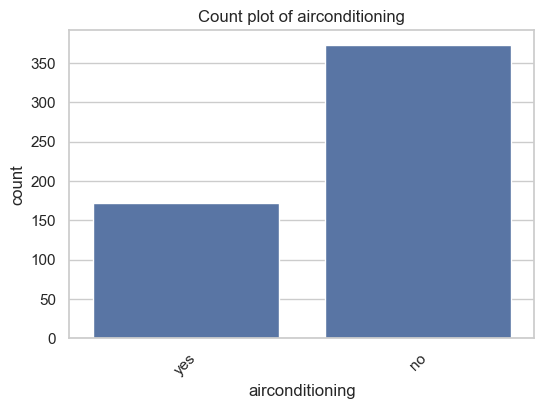

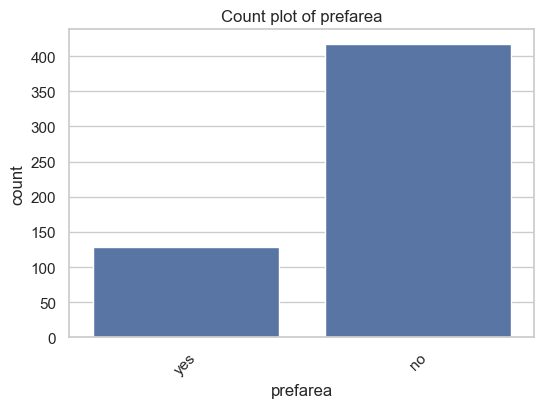

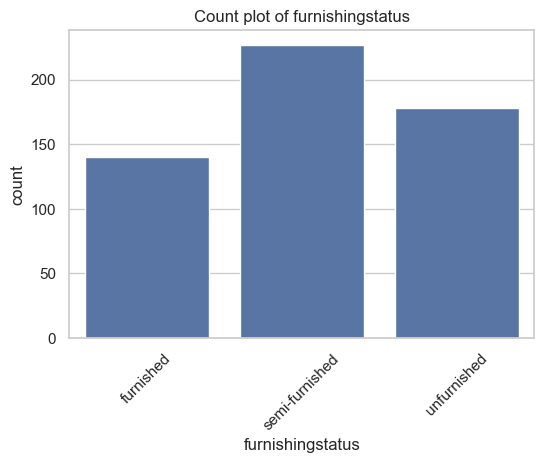

In [15]:
cat_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

### Correlation Analysis

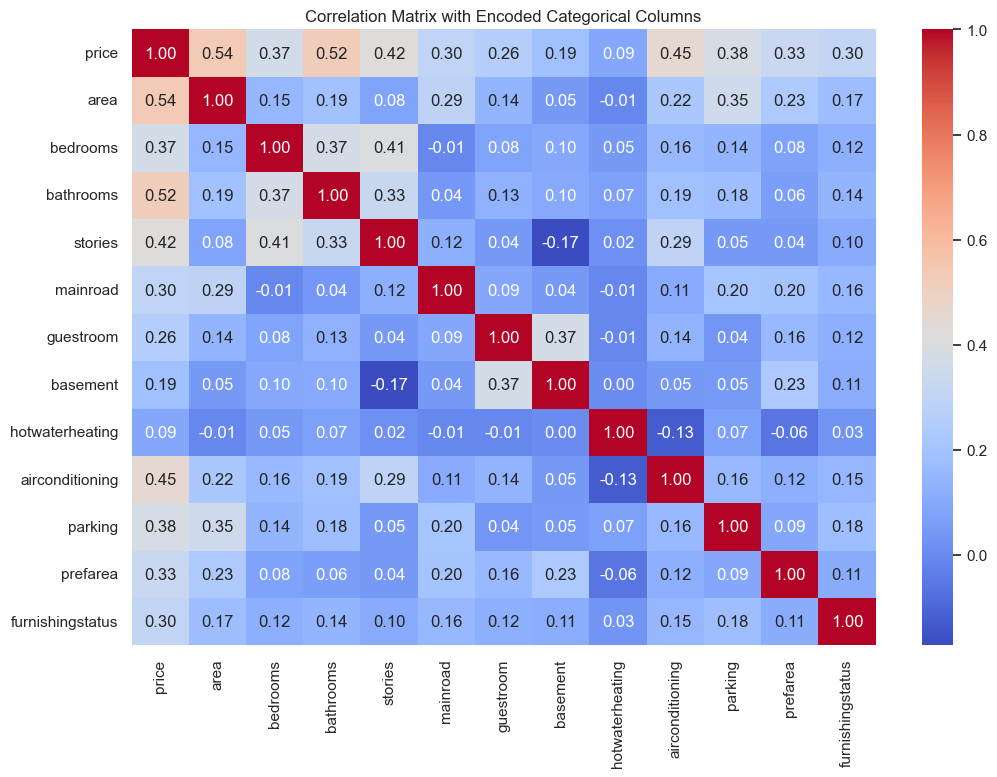

In [18]:
df_encoded = df.copy()

# Convert yes/no to 1/0
bool_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for col in bool_cols:
    df_encoded[col] = df_encoded[col].map({"yes":1, "no":0})

# Convert furnishingstatus to ordinal
df_encoded["furnishingstatus"] = df_encoded["furnishingstatus"].map({
    "unfurnished":0, "semi-furnished":1, "furnished":2
})

plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix with Encoded Categorical Columns")
plt.show()

---